In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/viral-and-nonviral-gene/virus.fasta
/kaggle/input/viral-and-nonviral-gene/plasmid.fasta
/kaggle/input/viral-and-nonviral-gene/bacteria.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Chikungunya_virus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_001263_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Zika_virus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_001733_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Pseudomonas_aeruginosa.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_011100_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Escherichia_coli.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Staphylococcus_aureus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_001422_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Human_papillomavirus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Clostridium_botulinum.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gen

In [5]:
!pip install --upgrade pip numpy scikit-learn pandas keras tensorflow torch dill matplotlib seaborn lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 84.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 71.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 50.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade scipy numpy

  Using cached numpy-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 108.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.3 which is incompatible.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, bu

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
import dill

In [9]:
bacillus_subtilis = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Bacillus_subtilis.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        bacillus_subtilis.append(str(seq_record.seq))
clostridium_botulinum = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Clostridium_botulinum.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        clostridium_botulinum.append(str(seq_record.seq))
escherichia_coli = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Escherichia_coli.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        escherichia_coli.append(str(seq_record.seq))
pseudomonas_aeruginosa = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Pseudomonas_aeruginosa.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        pseudomonas_aeruginosa.append(str(seq_record.seq))
staphylococcus_aureus = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Staphylococcus_aureus.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        staphylococcus_aureus.append(str(seq_record.seq))
listeria_monocytogenes = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Listeria_monocytogenes.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        listeria_monocytogenes.append(str(seq_record.seq))


In [10]:
from collections import Counter

def gc_content(sequence):
    g_count = sequence.count('G')
    c_count = sequence.count('C')
    total_bases = len(sequence)
    gc_percentage = (g_count + c_count) / total_bases * 100
    return gc_percentage

def at_content(sequence):
    a_count = sequence.count('A')
    t_count = sequence.count('T')
    total_bases = len(sequence)
    at_percentage = (a_count + t_count) / total_bases * 100
    return at_percentage

def kmer_frequencies(sequence, k=3):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    kmer_counts = Counter(kmers)
    return kmer_counts

def molecular_weight(sequence):
    nucleotide_weights = {
        'A': 331.2,
        'T': 322.2,
        'C': 307.2,
        'G': 347.2
    }
    weight = sum(nucleotide_weights[nuc] for nuc in sequence if nuc in nucleotide_weights)
    return weight

def hydrophobicity(sequence):
    hydrophobic_nucleotides = {'A', 'T'}
    hydrophilic_nucleotides = {'C', 'G'}
    hydrophobic_score = sum(1 for nuc in sequence if nuc in hydrophobic_nucleotides)
    hydrophilic_score = sum(1 for nuc in sequence if nuc in hydrophilic_nucleotides)
    return hydrophobic_score / len(sequence), hydrophilic_score / len(sequence)

def dinucleotide_frequencies(seq):
    dinucs = [seq[i:i+2] for i in range(len(seq)-1)]
    freq = Counter(dinucs)
    return {dinuc: freq[dinuc] / len(dinucs) for dinuc in freq}

def sequence_entropy(seq):
    freq = Counter(seq)
    probs = [freq[base] / len(seq) for base in freq]
    return -sum(p * np.log2(p) for p in probs)


def Kmers_contribution(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [11]:
bacteria_sequences = {
    "escherichia_coli": escherichia_coli,
    "bacillus_subtilis": bacillus_subtilis,
    "pseudomonas_aeruginosa": pseudomonas_aeruginosa,
    "staphylococcus_aureus": staphylococcus_aureus,
    "listeria_monocytogenes": listeria_monocytogenes,
    "clostridium_botulinum": clostridium_botulinum
}

In [12]:
import dill
tfidf_path = "/kaggle/input/tfidf_gene/scikitlearn/default/1/tfidf .pkl"
with open(tfidf_path, "rb") as f:
    tfidf = dill.load(f)

In [13]:
df_bacteria = pd.DataFrame(columns=['Sequence', 'GC', 'AT', 'Molecular Wt', 'Hydrophobic Score', 'Hydrophilic Score', 'Sequence Entropy', 'Organism'])

In [14]:
for name, sequences in bacteria_sequences.items():
    for seq in sequences:
        seq = seq.replace('\n', '')
        words = Kmers_contribution(seq)
        joined_words = ' '.join(words)
        gc = gc_content(seq)
        at = at_content(seq)
        mw = molecular_weight(seq)
        hydrophobic_score, hydrophilic_score = hydrophobicity(seq)
        s_entropy = sequence_entropy(seq)
        
        # Append data to the DataFrame
        df_bacteria.loc[len(df_bacteria)] = [joined_words, gc, at, mw, hydrophobic_score, hydrophilic_score, s_entropy, name]

# Check the final shape of the DataFrame
print(df_bacteria.shape)

(9000, 8)


In [15]:
df_bacteria.sample(10)

,Sequence,GC,AT,Molecular Wt,Hydrophobic Score,Hydrophilic Score,Sequence Entropy,Organism
8186,gatgat atgata tgatat gatata atatag tataga atag...,33.632287,66.367713,1.467412e+05,0.663677,0.336323,1.894898,clostridium_botulinum
926,aattta atttaa tttaac ttaacg taacga aacgac acga...,48.228883,51.771117,1.193034e+05,0.517711,0.482289,1.980324,escherichia_coli
626,gtacct tacctg acctgt cctgta ctgtaa tgtaat gtaa...,50.642213,49.357787,1.264787e+08,0.493578,0.506422,1.999548,escherichia_coli
561,attgtc ttgtca tgtcat gtcatt tcatta cattat atta...,49.677203,50.322797,8.754009e+06,0.503228,0.496772,1.999238,escherichia_coli
3848,gcgcgc cgcgcc gcgccc cgccct gccctt cccttg cctt...,66.855204,33.144686,2.977455e+08,0.331447,0.668552,1.915955,pseudomonas_aeruginosa
8569,agtttt gtttta ttttaa tttaac ttaact taactt aact...,24.961948,75.038052,2.131114e+05,0.750381,0.249619,1.771232,clostridium_botulinum
5517,aagtat agtatt gtattt tatttg atttgt tttgtt ttgt...,30.245431,69.754569,3.141951e+06,0.697546,0.302454,1.872176,staphylococcus_aureus
5689,gtaaaa taaaaa aaaaaa aaaaat aaaatt aaattt aatt...,37.450199,62.549801,8.206220e+04,0.625498,0.374502,1.953901,staphylococcus_aureus
4348,ctcgct tcgctg cgctgg gctgga ctggag tggagg ggag...,64.876033,35.123967,4.744354e+05,0.351240,0.648760,1.934853,pseudomonas_aeruginosa
6386,ttctgc tctgcc ctgccc tgccct gccctg ccctgc cctg...,38.397516,61.602484,1.699542e+08,0.616025,0.383975,1.960699,listeria_monocytogenes


In [16]:
from sklearn.preprocessing import LabelEncoder
le_bacteria = LabelEncoder()
df_bacteria['Organism'] = le_bacteria.fit_transform(df_bacteria['Organism'])

In [17]:
dict(zip(le_bacteria.classes_, range(len(le_bacteria.classes_))))

{'bacillus_subtilis': 0,
 'clostridium_botulinum': 1,
 'escherichia_coli': 2,
 'listeria_monocytogenes': 3,
 'pseudomonas_aeruginosa': 4,
 'staphylococcus_aureus': 5}

In [18]:
sequence_features_bacteria = tfidf.transform(df_bacteria['Sequence']).toarray()
sequence_feature_names_bacteria = tfidf.get_feature_names_out()
numeric_features_bacteria = df_bacteria.drop(columns=['Sequence', 'Organism']).values
combined_features_bacteria = np.hstack((sequence_features_bacteria, numeric_features_bacteria))
target_bacteria = df_bacteria['Organism']
x_dense_bacteria = pd.DataFrame(combined_features_bacteria, columns=sequence_feature_names_bacteria.tolist() + df_bacteria.drop(columns=['Sequence', 'Organism']).columns.tolist())
x_dense_bacteria.sample(10)

,aaaaaa,aaaaac,aaaaag,aaaaak,aaaaam,aaaaan,aaaaar,aaaaat,aaaaaw,aaaaay,...,yytgak,yytgcg,yytgct,yytggc,GC,AT,Molecular Wt,Hydrophobic Score,Hydrophilic Score,Sequence Entropy
5429,0.019922,0.000000,0.018737,0.0,0.0,0.0,0.0,0.079039,0.0,0.0,...,0.0,0.0,0.0,0.0,33.516484,66.483516,4.164908e+05,0.664835,0.335165,1.917939
2071,0.000000,0.000000,0.026324,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,53.191489,46.808511,2.455164e+05,0.468085,0.531915,1.989888
7252,0.094367,0.041093,0.067751,0.0,0.0,0.0,0.0,0.095029,0.0,0.0,...,0.0,0.0,0.0,0.0,37.598257,62.401743,1.954946e+07,0.624017,0.375983,1.952466
7397,0.075769,0.041173,0.040946,0.0,0.0,0.0,0.0,0.071001,0.0,0.0,...,0.0,0.0,0.0,0.0,37.865953,62.134047,3.290692e+07,0.621340,0.378660,1.952890
7137,0.074062,0.045094,0.047544,0.0,0.0,0.0,0.0,0.047807,0.0,0.0,...,0.0,0.0,0.0,0.0,38.127738,61.872262,1.160743e+07,0.618723,0.381277,1.954845
281,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.029485,0.0,0.0,...,0.0,0.0,0.0,0.0,58.962264,41.037736,2.085122e+05,0.410377,0.589623,1.972532
509,0.035447,0.041505,0.022226,0.0,0.0,0.0,0.0,0.023439,0.0,0.0,...,0.0,0.0,0.0,0.0,53.922740,46.077260,8.209034e+06,0.460773,0.539227,1.995098
1084,0.000000,0.022206,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,44.652908,55.347092,3.480232e+05,0.553471,0.446529,1.990498
8605,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,49.586777,50.413223,2.285172e+05,0.504132,0.495868,0.999951
2706,0.086489,0.053619,0.071421,0.0,0.0,0.0,0.0,0.054231,0.0,0.0,...,0.0,0.0,0.0,0.0,44.874805,55.125195,9.711094e+07,0.551252,0.448748,1.990582


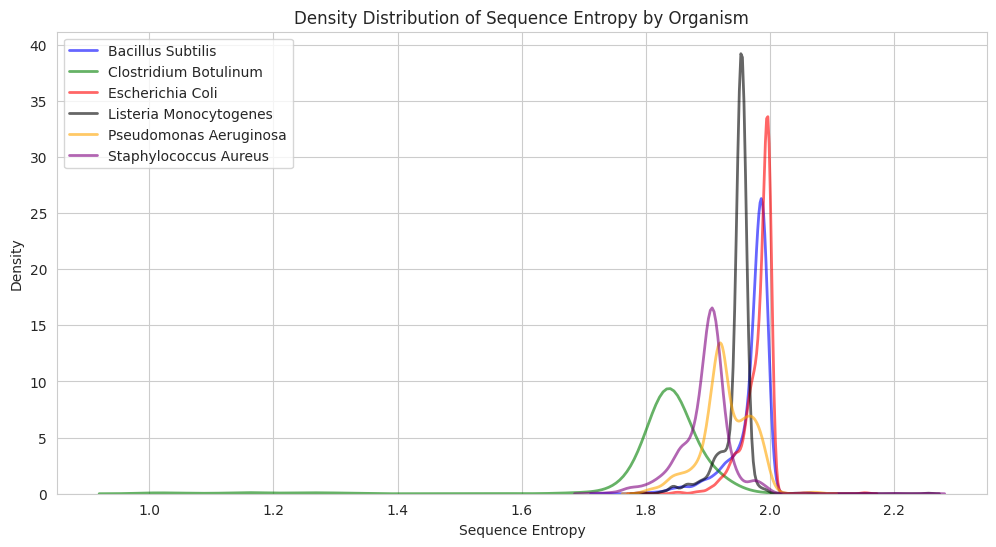

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter entropy values by organism type
df_entropy_0 = df_bacteria[df_bacteria['Organism'] == 0][['Sequence Entropy']].reset_index(drop=True)
df_entropy_1 = df_bacteria[df_bacteria['Organism'] == 1][['Sequence Entropy']].reset_index(drop=True)
df_entropy_2 = df_bacteria[df_bacteria['Organism'] == 2][['Sequence Entropy']].reset_index(drop=True)
df_entropy_3 = df_bacteria[df_bacteria['Organism'] == 3][['Sequence Entropy']].reset_index(drop=True)
df_entropy_4 = df_bacteria[df_bacteria['Organism'] == 4][['Sequence Entropy']].reset_index(drop=True)
df_entropy_5 = df_bacteria[df_bacteria['Organism'] == 5][['Sequence Entropy']].reset_index(drop=True)

# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# KDE plots for each class
sns.kdeplot(df_entropy_0['Sequence Entropy'], label="Bacillus Subtilis", color='blue', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_1['Sequence Entropy'], label="Clostridium Botulinum", color='green', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_2['Sequence Entropy'], label="Escherichia Coli", color='red', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_3['Sequence Entropy'], label="Listeria Monocytogenes", color='black', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_4['Sequence Entropy'], label="Pseudomonas Aeruginosa", color='orange', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_5['Sequence Entropy'], label="Staphylococcus Aureus", color='purple', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel("Sequence Entropy")
plt.ylabel("Density")
plt.title("Density Distribution of Sequence Entropy by Organism")
plt.legend()
plt.show()

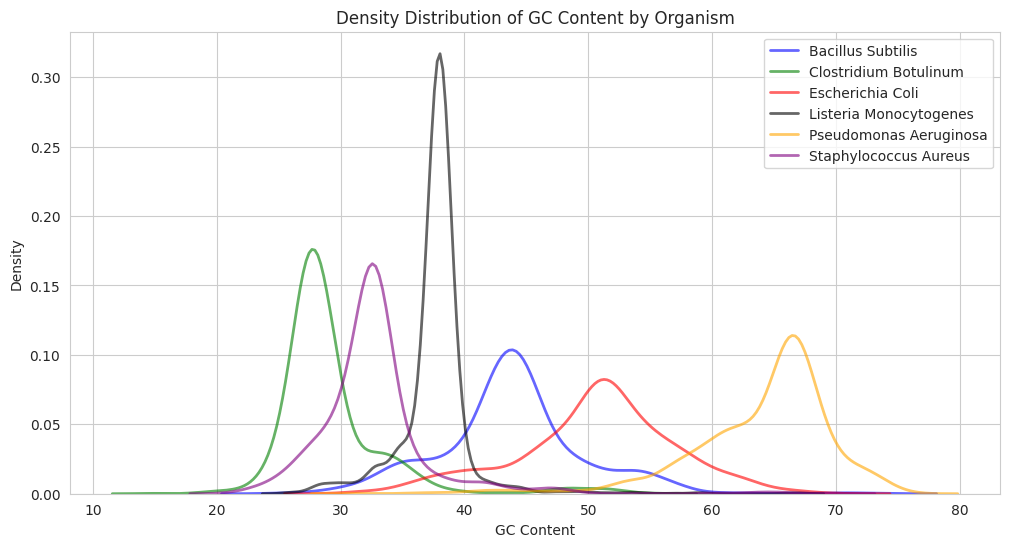

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter GC content values by organism type
df_gc_0 = df_bacteria[df_bacteria['Organism'] == 0][['GC']].reset_index(drop=True)
df_gc_1 = df_bacteria[df_bacteria['Organism'] == 1][['GC']].reset_index(drop=True)
df_gc_2 = df_bacteria[df_bacteria['Organism'] == 2][['GC']].reset_index(drop=True)
df_gc_3 = df_bacteria[df_bacteria['Organism'] == 3][['GC']].reset_index(drop=True)
df_gc_4 = df_bacteria[df_bacteria['Organism'] == 4][['GC']].reset_index(drop=True)
df_gc_5 = df_bacteria[df_bacteria['Organism'] == 5][['GC']].reset_index(drop=True)

# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# KDE plots for each class
sns.kdeplot(df_gc_0['GC'], label="Bacillus Subtilis", color='blue', linewidth=2, alpha=0.6)
sns.kdeplot(df_gc_1['GC'], label="Clostridium Botulinum", color='green', linewidth=2, alpha=0.6)
sns.kdeplot(df_gc_2['GC'], label="Escherichia Coli", color='red', linewidth=2, alpha=0.6)
sns.kdeplot(df_gc_3['GC'], label="Listeria Monocytogenes", color='black', linewidth=2, alpha=0.6)
sns.kdeplot(df_gc_4['GC'], label="Pseudomonas Aeruginosa", color='orange', linewidth=2, alpha=0.6)
sns.kdeplot(df_gc_5['GC'], label="Staphylococcus Aureus", color='purple', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel("GC Content")
plt.ylabel("Density")
plt.title("Density Distribution of GC Content by Organism")
plt.legend()
plt.show()


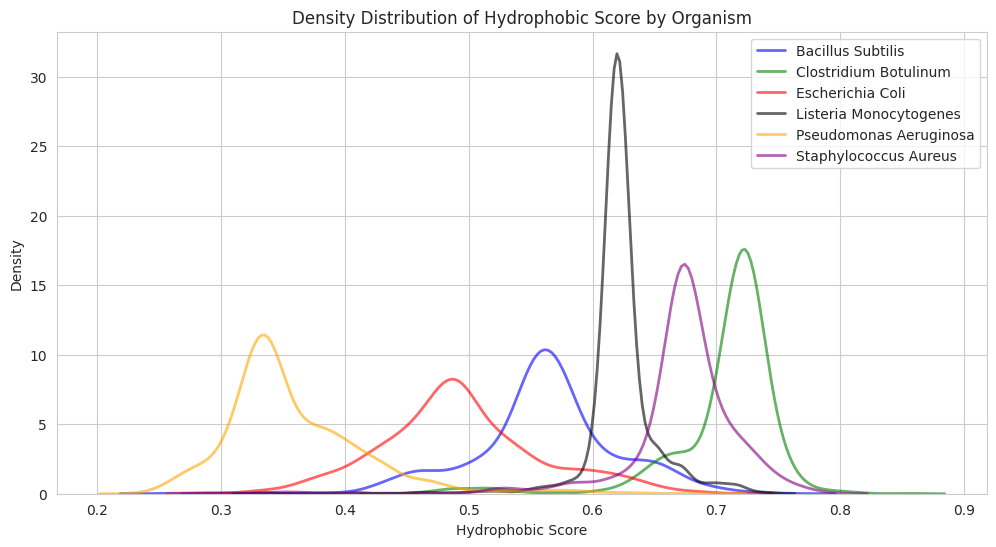

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter Hydrophobic Score values by organism type
df_hydro_0 = df_bacteria[df_bacteria['Organism'] == 0][['Hydrophobic Score']].reset_index(drop=True)
df_hydro_1 = df_bacteria[df_bacteria['Organism'] == 1][['Hydrophobic Score']].reset_index(drop=True)
df_hydro_2 = df_bacteria[df_bacteria['Organism'] == 2][['Hydrophobic Score']].reset_index(drop=True)
df_hydro_3 = df_bacteria[df_bacteria['Organism'] == 3][['Hydrophobic Score']].reset_index(drop=True)
df_hydro_4 = df_bacteria[df_bacteria['Organism'] == 4][['Hydrophobic Score']].reset_index(drop=True)
df_hydro_5 = df_bacteria[df_bacteria['Organism'] == 5][['Hydrophobic Score']].reset_index(drop=True)

# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# KDE plots for each class
sns.kdeplot(df_hydro_0['Hydrophobic Score'], label="Bacillus Subtilis", color='blue', linewidth=2, alpha=0.6)
sns.kdeplot(df_hydro_1['Hydrophobic Score'], label="Clostridium Botulinum", color='green', linewidth=2, alpha=0.6)
sns.kdeplot(df_hydro_2['Hydrophobic Score'], label="Escherichia Coli", color='red', linewidth=2, alpha=0.6)
sns.kdeplot(df_hydro_3['Hydrophobic Score'], label="Listeria Monocytogenes", color='black', linewidth=2, alpha=0.6)
sns.kdeplot(df_hydro_4['Hydrophobic Score'], label="Pseudomonas Aeruginosa", color='orange', linewidth=2, alpha=0.6)
sns.kdeplot(df_hydro_5['Hydrophobic Score'], label="Staphylococcus Aureus", color='purple', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel("Hydrophobic Score")
plt.ylabel("Density")
plt.title("Density Distribution of Hydrophobic Score by Organism")
plt.legend()
plt.show()


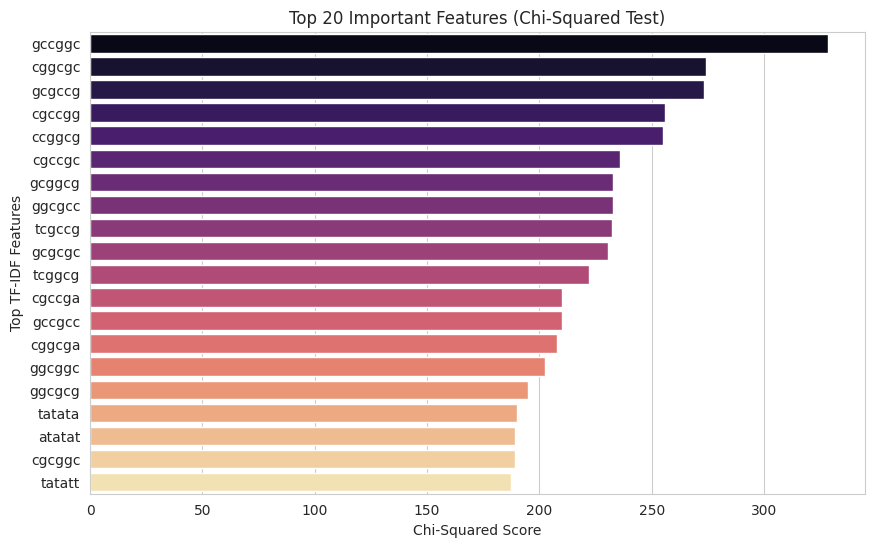

In [23]:
from sklearn.feature_selection import chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out features with zero variance to avoid divide-by-zero errors
nonzero_var_idx = np.where(sequence_features_bacteria.sum(axis=0) > 0)[0]
filtered_features = sequence_features_bacteria[:, nonzero_var_idx]
filtered_feature_names = [sequence_feature_names_bacteria[i] for i in nonzero_var_idx]

# Compute chi-squared scores
chi2_scores, _ = chi2(filtered_features, target_bacteria)

# Sort features by chi-squared score
sorted_idx = np.argsort(chi2_scores)[::-1]  # Descending order
top_n = 20  # Number of top features to visualize
top_features = [filtered_feature_names[i] for i in sorted_idx[:top_n]]
top_chi2 = chi2_scores[sorted_idx[:top_n]]

# Drop "nnnnnn" if it exists
if "nnnnnn" in top_features:
    drop_idx = top_features.index("nnnnnn")
    top_features.pop(drop_idx)
    top_chi2 = np.delete(top_chi2, drop_idx)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_chi2, y=top_features, hue=top_features, dodge=False, palette="magma")

plt.xlabel("Chi-Squared Score")
plt.ylabel("Top TF-IDF Features")
plt.title("Top 20 Important Features (Chi-Squared Test)")
plt.legend([],[], frameon=False)  # Hide legend
plt.show()


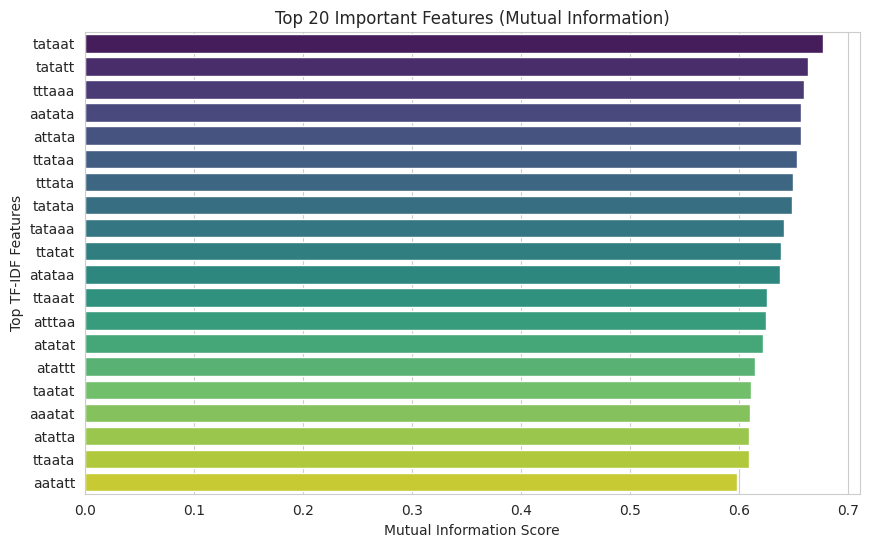

In [24]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Mutual Information scores
mi_scores = mutual_info_classif(sequence_features_bacteria, target_bacteria, discrete_features=False)

# Sort features by MI score
sorted_idx = np.argsort(mi_scores)[::-1]  # Descending order
top_n = 20  # Number of top features to visualize
top_features = [sequence_feature_names_bacteria[i] for i in sorted_idx[:top_n]]
top_mi = mi_scores[sorted_idx[:top_n]]

# Drop "nnnnnn" if it exists
if "nnnnnn" in top_features:
    drop_idx = top_features.index("nnnnnn")
    top_features.pop(drop_idx)
    top_mi = np.delete(top_mi, drop_idx)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mi, y=top_features, hue=top_features, dodge=False, palette="viridis")

plt.xlabel("Mutual Information Score")
plt.ylabel("Top TF-IDF Features")
plt.title("Top 20 Important Features (Mutual Information)")
plt.legend([],[], frameon=False)  # Hide legend
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
x_train_bacteria,x_test_bacteria,y_train_bacteria,y_test_bacteria = train_test_split(x_dense_bacteria,target_bacteria,test_size=0.2,random_state=42,stratify=target_bacteria)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler_bacteria = StandardScaler()
x_train_bacteria = scaler_bacteria.fit_transform(x_train_bacteria)
x_test_bacteria = scaler_bacteria.transform(x_test_bacteria)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier
)
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Initialize Label Binarizer
label_binarize = LabelBinarizer()

# Define hyperparameters
common_params = {
    "n_estimators": 3000,
    "learning_rate": 0.03,
    "max_depth": 7,
    "subsample": 0.7,
    "max_features": "log2",
    "min_samples_split": 10,
    "min_samples_leaf": 5,
}

# Define classifiers with the same parameters where applicable
classifiers_params = {
    "Gradient Boosting": GradientBoostingClassifier(
        **common_params,
        n_iter_no_change=10,
        verbose=1,
        warm_start=True,
    ),
    "LightGBM": lgb.LGBMClassifier(
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=1000,
        max_depth=-1,
        objective="multiclass",
        metric="multi_logloss",
        verbose=-1
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    "Logistic Regression": LogisticRegression(
        solver="lbfgs",
        max_iter=500,
        multi_class="multinomial",
        random_state=42,
    ),
    "XGBoost": XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        objective="multi:softprob",
        eval_metric="mlogloss",
        use_label_encoder=False,
        verbosity=0
    ),
    "Naïve Bayes": GaussianNB()
}

In [22]:
def train_and_evaluate_models(x_train, y_train, x_test, y_test, classifiers):
    best_model = None
    best_model_name = ""
    best_test_accuracy = 0  # Store the best test accuracy

    for model_name, model in classifiers.items():
        model.fit(x_train, y_train)

        # Binarize labels if multiclass
        n_classes = len(np.unique(y_train))
        label_binarize.fit(y_train)  # Fit on training data
        y_train_bin = label_binarize.transform(y_train) if n_classes > 2 else y_train
        y_test_bin = label_binarize.transform(y_test) if n_classes > 2 else y_test

        # Training evaluation
        y_train_pred = model.predict(x_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_cm = confusion_matrix(y_train, y_train_pred)

        print(f"\nModel: {model_name} (Training Data)")
        print(f"Training Accuracy: {train_accuracy:.2f}")
        print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

        ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=np.unique(y_train)).plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name} (Training Data)')
        plt.grid(False)
        plt.show()

        # Test evaluation
        y_test_pred = model.predict(x_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_cm = confusion_matrix(y_test, y_test_pred)

        print(f"\nModel: {model_name} (Test Data)")
        print(f"Test Accuracy: {test_accuracy:.2f}")
        print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

        ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=np.unique(y_test)).plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name} (Test Data)')
        plt.grid(False)
        plt.show()

        # ROC Curve
        if hasattr(model, "predict_proba"):
            y_test_proba = model.predict_proba(x_test)

            plt.figure(figsize=(10, 5))

            if n_classes > 2:  # Multi-class classification
                for i in range(n_classes):
                    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

            else:  # Binary classification
                fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, 1])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')

            plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve for {model_name}")
            plt.legend(loc="lower right")
            plt.show()
        
        # Select the best model
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_model = model
            best_model_name = model_name

    print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_test_accuracy:.2f}")
    return best_model

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.7370           0.0487            4.35m
         2           1.6881           0.0532            4.45m
         3           1.6452           0.0408            4.29m
         4           1.6150           0.0288            4.04m
         5           1.5782           0.0357            3.91m
         6           1.5454           0.0417            3.85m
         7           1.4984           0.0433            3.98m
         8           1.4638           0.0288            3.96m
         9           1.4281           0.0485            4.01m
        10           1.4033           0.0216            3.92m
        20           1.1705           0.0156            3.72m
        30           1.0070           0.0134            3.70m
        40           0.8964           0.0311            3.57m
        50           0.7925          -0.0061            3.57m
        60           0.7194          -0.0011            3.57m
       

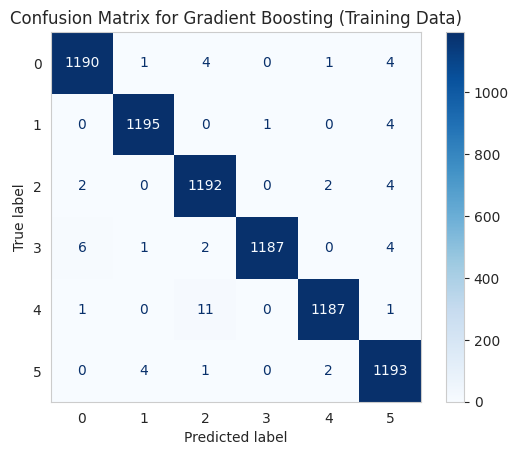


Model: Gradient Boosting (Test Data)
Test Accuracy: 0.92
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       300
           1       0.95      0.97      0.96       300
           2       0.89      0.90      0.90       300
           3       1.00      0.89      0.94       300
           4       0.98      0.97      0.97       300
           5       0.85      0.93      0.89       300

    accuracy                           0.92      1800
   macro avg       0.93      0.92      0.92      1800
weighted avg       0.93      0.92      0.92      1800



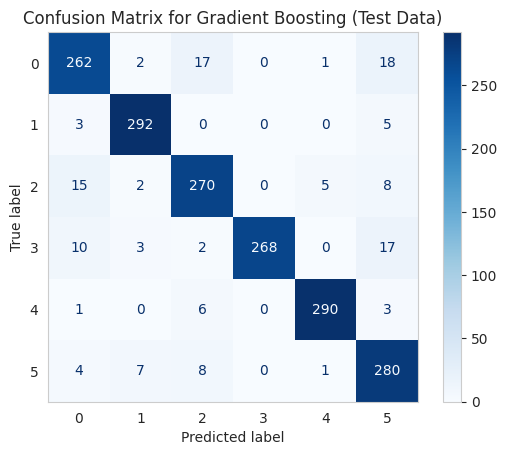

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:1108: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  X = _LGBMValidateData(



Model: LightGBM (Training Data)
Training Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      1.00      1.00      1200
           2       1.00      1.00      1.00      1200
           3       1.00      1.00      1.00      1200
           4       1.00      1.00      1.00      1200
           5       1.00      1.00      1.00      1200

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



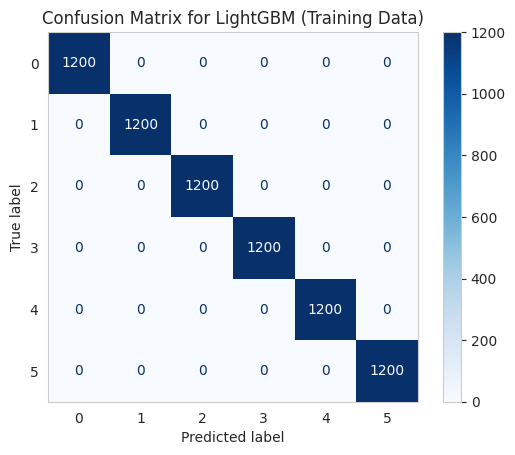

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:1108: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  X = _LGBMValidateData(



Model: LightGBM (Test Data)
Test Accuracy: 0.94
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       300
           1       0.95      0.98      0.97       300
           2       0.89      0.93      0.91       300
           3       0.99      0.92      0.95       300
           4       0.98      0.97      0.97       300
           5       0.90      0.95      0.93       300

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800



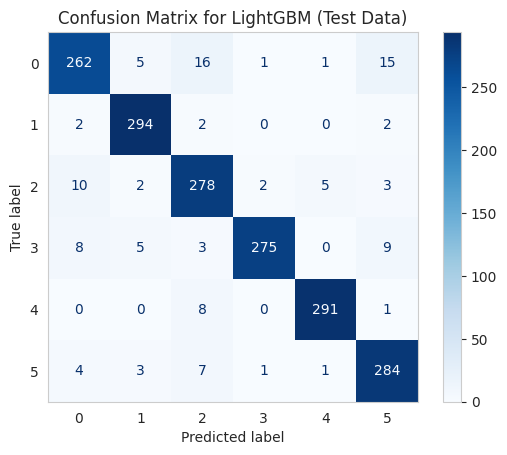


Model: Random Forest (Training Data)
Training Accuracy: 0.95
Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.99      0.98      0.98      1200
           2       0.88      0.99      0.93      1200
           3       1.00      0.90      0.95      1200
           4       0.98      0.97      0.97      1200
           5       0.98      0.93      0.95      1200

    accuracy                           0.95      7200
   macro avg       0.96      0.95      0.95      7200
weighted avg       0.96      0.95      0.95      7200



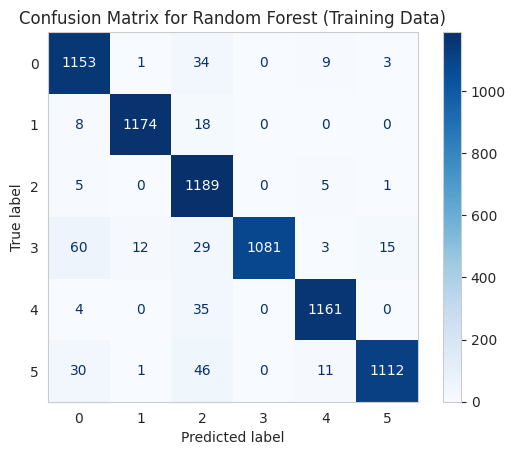


Model: Random Forest (Test Data)
Test Accuracy: 0.89
Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       300
           1       0.92      0.95      0.93       300
           2       0.82      0.90      0.86       300
           3       0.99      0.87      0.92       300
           4       0.97      0.96      0.96       300
           5       0.86      0.82      0.84       300

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800



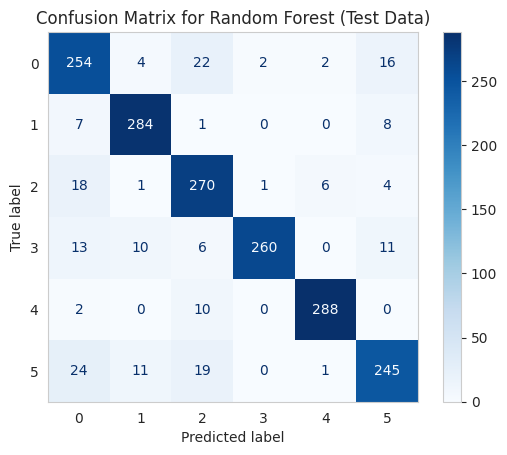

<ipython-input-30-2548f687da82>:7: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  model.fit(x_train, y_train)



Model: Logistic Regression (Training Data)
Training Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      1.00      1.00      1200
           2       1.00      1.00      1.00      1200
           3       1.00      1.00      1.00      1200
           4       1.00      1.00      1.00      1200
           5       1.00      1.00      1.00      1200

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



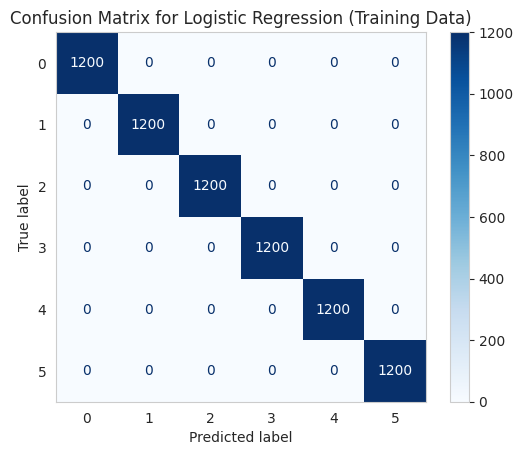


Model: Logistic Regression (Test Data)
Test Accuracy: 0.92
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       300
           1       0.93      0.97      0.95       300
           2       0.87      0.92      0.89       300
           3       0.97      0.93      0.95       300
           4       0.94      0.94      0.94       300
           5       0.90      0.92      0.91       300

    accuracy                           0.92      1800
   macro avg       0.92      0.92      0.92      1800
weighted avg       0.92      0.92      0.92      1800



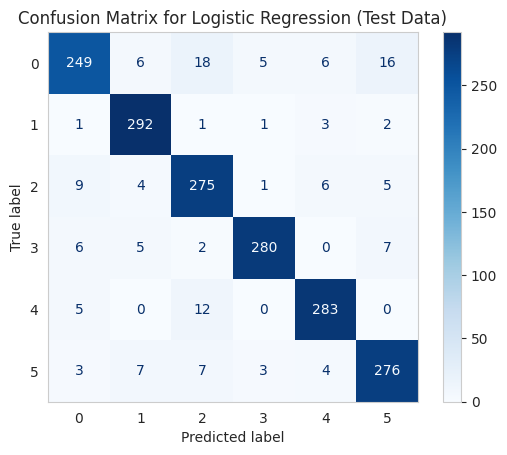


Model: XGBoost (Training Data)
Training Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      1.00      1.00      1200
           2       1.00      1.00      1.00      1200
           3       1.00      1.00      1.00      1200
           4       1.00      1.00      1.00      1200
           5       1.00      1.00      1.00      1200

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



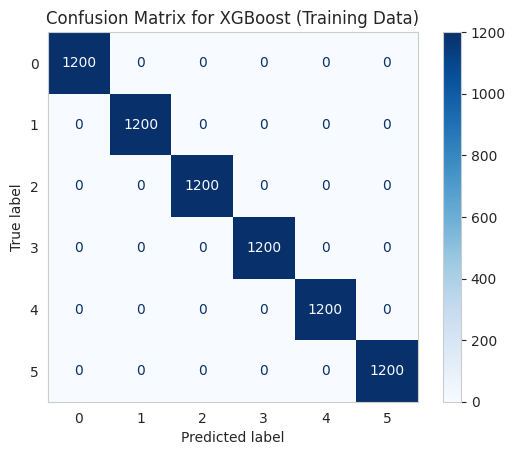


Model: XGBoost (Test Data)
Test Accuracy: 0.93
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       300
           1       0.94      0.97      0.96       300
           2       0.88      0.92      0.90       300
           3       0.97      0.91      0.94       300
           4       0.97      0.96      0.96       300
           5       0.89      0.93      0.91       300

    accuracy                           0.93      1800
   macro avg       0.93      0.93      0.93      1800
weighted avg       0.93      0.93      0.93      1800



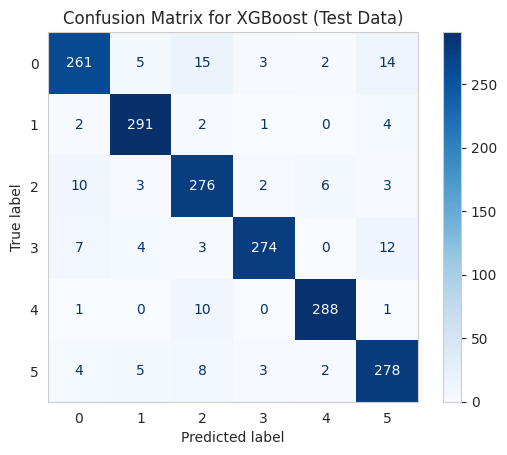


Model: Naïve Bayes (Training Data)
Training Accuracy: 0.35
Training Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.60      0.34      1200
           1       0.37      1.00      0.54      1200
           2       0.33      0.00      0.00      1200
           3       0.46      0.22      0.30      1200
           4       1.00      0.21      0.35      1200
           5       1.00      0.07      0.13      1200

    accuracy                           0.35      7200
   macro avg       0.57      0.35      0.28      7200
weighted avg       0.57      0.35      0.28      7200



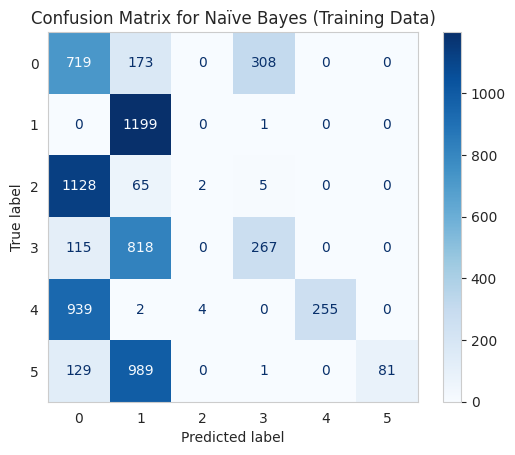


Model: Naïve Bayes (Test Data)
Test Accuracy: 0.32
Test Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.57      0.33       300
           1       0.35      0.98      0.52       300
           2       0.04      0.00      0.01       300
           3       0.43      0.18      0.26       300
           4       0.91      0.16      0.28       300
           5       0.38      0.03      0.06       300

    accuracy                           0.32      1800
   macro avg       0.39      0.32      0.24      1800
weighted avg       0.39      0.32      0.24      1800



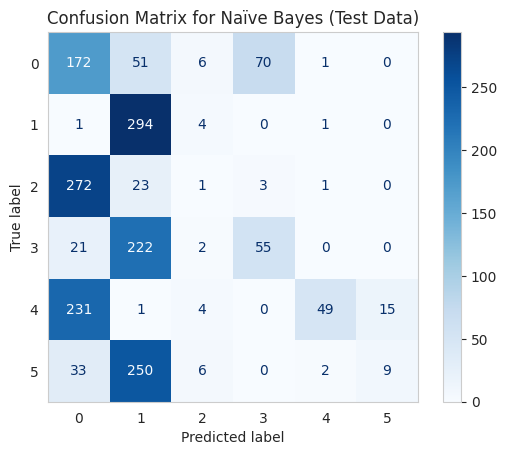


Best Model: Naïve Bayes with least overfitting: 0.03


In [31]:
best_model_bacteria = train_and_evaluate_models(x_train_bacteria, y_train_bacteria, x_test_bacteria, y_test_bacteria)

In [19]:
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
print(torch.__version__)

2.6.0+cu124


In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [21]:
print(type(x_train_bacteria))
print(type(y_train_bacteria))
print(type(x_test_bacteria))
print(type(y_test_bacteria))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
torch.manual_seed(42)


x_train = scaler.fit_transform(x_train_bacteria)
x_test = scaler.transform(x_test_bacteria)
y_train = y_train_bacteria.to_numpy().reshape(-1)
y_test = y_test_bacteria.to_numpy().reshape(-1)

In [23]:
class CustomDataset(Dataset):
  def __init__(self,features,targets):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.targets = torch.tensor(targets,dtype=torch.long)
  def __len__(self):
    return len(self.features)
  def __getitem__(self,idx):
    return self.features[idx],self.targets[idx]

In [24]:
train_dataset = CustomDataset(x_train,y_train)
test_dataset = CustomDataset(x_test,y_test)

In [25]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True,pin_memory=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False,pin_memory=True)

In [26]:
len(train_loader)

225

In [40]:
class MyNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(512,256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(256,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(64,6)
    )
  def forward(self,x):
    return self.model(x)

In [41]:
epochs = 500
learning_rate = 0.0001

In [42]:
model = MyNN(x_train.shape[1])
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

In [43]:
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features,batch_targets in train_loader:
    batch_features = batch_features.to(device)
    batch_targets = batch_targets.to(device)
    outputs = model(batch_features)
    loss = criterion(outputs,batch_targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_epoch_loss += loss.item()
  print(f'Epoch: {epoch+1}/{epochs}, Loss: {total_epoch_loss/len(train_loader)}')

Epoch: 1/500, Loss: 1.861439061694675
Epoch: 2/500, Loss: 1.7807321808073255
Epoch: 3/500, Loss: 1.724038552708096
Epoch: 4/500, Loss: 1.66947287718455
Epoch: 5/500, Loss: 1.637742782168918
Epoch: 6/500, Loss: 1.622302926911248
Epoch: 7/500, Loss: 1.5805297178692288
Epoch: 8/500, Loss: 1.5587240521113077
Epoch: 9/500, Loss: 1.5412480068206786
Epoch: 10/500, Loss: 1.534666233062744
Epoch: 11/500, Loss: 1.5017410601509942
Epoch: 12/500, Loss: 1.483254861301846
Epoch: 13/500, Loss: 1.4685056850645277
Epoch: 14/500, Loss: 1.4496649408340454
Epoch: 15/500, Loss: 1.4372853093677096
Epoch: 16/500, Loss: 1.418953432506985
Epoch: 17/500, Loss: 1.4046088107426962
Epoch: 18/500, Loss: 1.3966319624582926
Epoch: 19/500, Loss: 1.379980453385247
Epoch: 20/500, Loss: 1.3769124449623955
Epoch: 21/500, Loss: 1.3522022570504082
Epoch: 22/500, Loss: 1.3407610125011868
Epoch: 23/500, Loss: 1.3295790269639758
Epoch: 24/500, Loss: 1.3152265877193874
Epoch: 25/500, Loss: 1.3106865670945909
Epoch: 26/500, Loss

In [47]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=32216, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=128, out_features=64, bias=True)
    (13): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=64, out_features=6, bias=True)
  )
)

In [48]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features,batch_targets in train_loader:
    batch_features = batch_features.to(device)
    batch_targets = batch_targets.to(device)
    outputs = model(batch_features)
    _,predicted = torch.max(outputs,1)
    # print(predicted)
    total += batch_targets.shape[0]
    correct += (predicted == batch_targets).sum().item()
print(f'Accuracy: {100*correct/total}')

Accuracy: 100.0


In [49]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features,batch_targets in test_loader:
    batch_features = batch_features.to(device)
    batch_targets = batch_targets.to(device)
    outputs = model(batch_features)
    _,predicted = torch.max(outputs,1)
    # print(predicted)
    total += batch_targets.shape[0]
    correct += (predicted == batch_targets).sum().item()
print(f'Accuracy: {100*correct/total}')

Accuracy: 92.05555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model: LightGBM (Training Data)
Training Accuracy: 1.00
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      1.00      1.00      1200
           2       1.00      1.00      1.00      1200
           3       1.00      1.00      1.00      1200
           4       1.00      1.00      1.00      1200
           5       1.00      1.00      1.00      1200

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



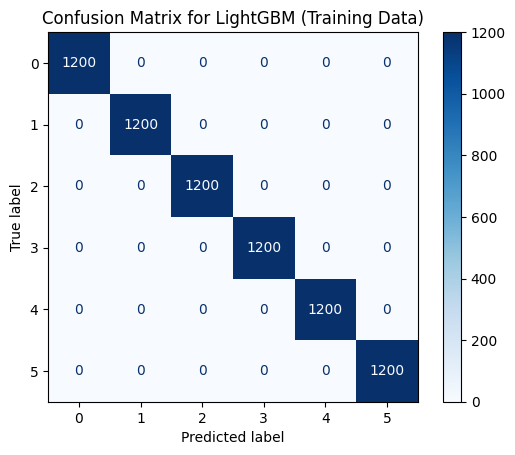

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model: LightGBM (Test Data)
Test Accuracy: 0.94
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       300
           1       0.95      0.98      0.97       300
           2       0.89      0.93      0.91       300
           3       0.99      0.92      0.95       300
           4       0.98      0.97      0.97       300
           5       0.90      0.95      0.93       300

    accuracy                           0.94      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.94      0.94      0.94      1800



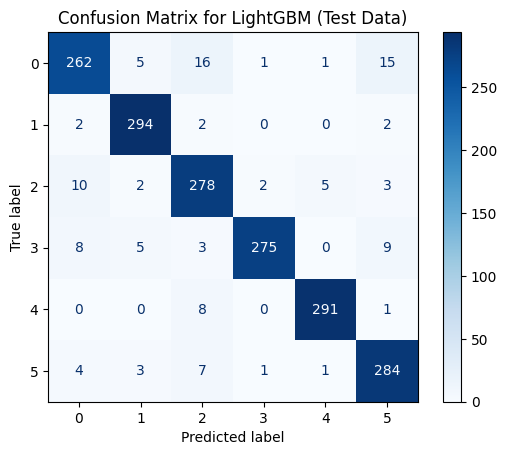

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


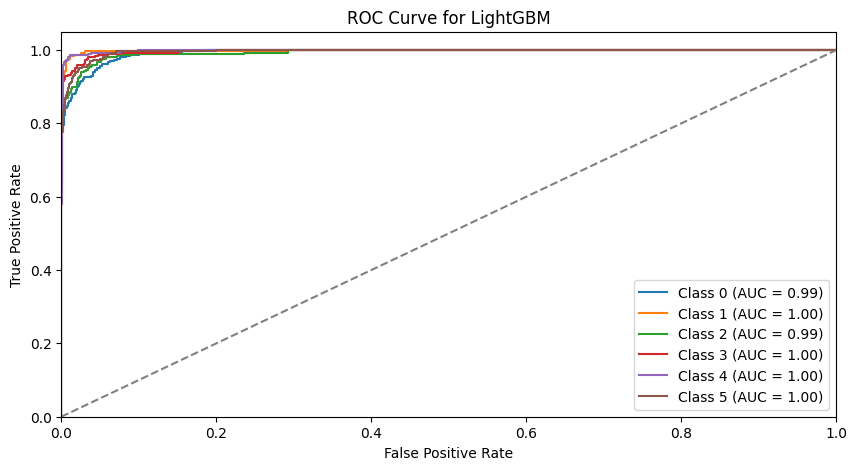


Best Model: LightGBM with Test Accuracy: 0.94


In [23]:
best_model_bacteria = train_and_evaluate_models(x_train_bacteria, y_train_bacteria, x_test_bacteria, y_test_bacteria,classifiers={
    "LightGBM": lgb.LGBMClassifier(
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=1000,
        max_depth=-1,
        objective="multiclass",
        metric="multi_logloss",
        verbose=-1
    ),
})